# Importar librerias y data

In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.4 MB/s eta 0:00:00


In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.1 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=8ec42f28252aa0de4345776b8fa094817ea65e024d6bc600b120c7583dd54a84
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import spacy
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

from transformers import pipeline
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

ModuleNotFoundError: ignored

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stopwords_nltk = stopwords.words('english')

LookupError: ignored

In [ ]:
df_transformado = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/modelo_csv/df_stem.csv", sep="|")

In [ ]:
df_transformado.head(2)

,rating,review,cleaned_text,sentiment_rating,no_stopwords,lemmatized,neg,neu,pos,compound,sentiment_vader,stem
0,5.0,This is totallly one of the best hotels in the...,This is totallly one of the best hotels in the...,2.0,This totallly best hotels city The rooms heavi...,this be totallly one of the good hotel in the ...,0.00,0.821,0.179,0.6656,2,thi is totallli one of the best hotel in the c...
1,5.0,Recently stayed here over the holidays and was...,Recently stayed here over the holidays and was...,2.0,Recently stayed holidays impressed fronts The ...,recently stay here over the holiday and be imp...,0.04,0.775,0.185,0.9468,2,recent stay here over the holiday and wa impre...


## Vectorizacion TFIDF

### Con una muestra pequeña

In [ ]:
df_sample = df_transformado.sample(2)
df_sample

,rating,review,cleaned_text,sentiment_rating,no_stopwords,lemmatized,neg,neu,pos,compound,sentiment_vader,stem
30484,3.0,Location is good. 4 minutes walking distance t...,Location is good 4 minutes walking distance to...,1.0,Location good 4 minutes walking distance 24 ho...,location be good 4 minute walk distance to 24 ...,0.110,0.710,0.179,0.3840,2,locat is good 4 minut walk distanc to 24 hour ...
9543,5.0,My family and I have been coming here for four...,My family and I have been coming here for four...,2.0,My family I coming years Its sublime Right san...,my family and I have be come here for four yea...,0.073,0.809,0.118,0.8783,2,my famili and i have been come here for four y...


In [ ]:
vectorizer = TfidfVectorizer(stop_words="english")

tfidf_matrix = vectorizer.fit_transform(df_sample["cleaned_text"])
list_matrix = tfidf_matrix.todense()

In [ ]:
tfidf_matrix.toarray()

array([[0.1767767 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.1767767 , 0.        , 0.1767767 , 0.        ,
        0.        , 0.        , 0.1767767 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.1767767 , 0.1767767 ,
        0.        , 0.        , 0.1767767 , 0.        , 0.        ,
        0.53033009, 0.        , 0.1767767 , 0.1767767 , 0.1767767 ,
        0.        , 0.1767767 , 0.1767767 , 0.1767767 , 0.        ,
        0.1767767 , 0.1767767 , 0.1767767 , 0.        , 0.        ,
        0.1767767 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.1767767 , 0.        , 0.        ,
        0.1767767 , 0.        , 0.        , 0.1767767 , 0.1767767 ,
        0.        , 0.        , 0.        , 0.1767767 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.1767767 , 0.        , 0.        ],
       [0.        , 0.12309149, 0.12309149, 0.1

In [ ]:
df_tfidf = pd.DataFrame(list_matrix,
                  columns=vectorizer.get_feature_names_out() ,
                  index= df_sample.index
                  )
df_tfidf

,24,ago,balconies,beach,better,bliss,breakfast,bummer,bus,called,...,thankful,thought,truly,try,unit,wait,walk,walking,wed,years
30484,0.176777,0.000000,0.000000,0.000000,0.000000,0.000000,0.176777,0.000000,0.176777,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176777,0.000000,0.000000
9543,0.000000,0.123091,0.123091,0.123091,0.123091,0.123091,0.000000,0.123091,0.000000,0.123091,...,0.123091,0.123091,0.123091,0.123091,0.123091,0.123091,0.246183,0.000000,0.123091,0.246183


### Con todo el df

In [ ]:
def feat_matrix(corpus, ngram_min, ngram_max):
    vectorizer = TfidfVectorizer(ngram_range=(ngram_min, ngram_max), stop_words="english")
    feature_matrix = vectorizer.fit_transform(corpus)
    return feature_matrix

In [ ]:
feature_matrix = feat_matrix(df_transformado["cleaned_text"], 1, 1)

In [ ]:
feature_matrix.shape

(30785, 37178)

## Clusterizacion

In [ ]:
print("Feature Matrix Shape:", feature_matrix.shape)
print("Sample Feature Matrix Row:", feature_matrix[0].toarray())

Feature Matrix Shape: (30785, 37178)
Sample Feature Matrix Row: [[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# 3 min

kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(feature_matrix)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

KMeans(n_clusters=9, random_state=42)

In [ ]:
feature_matrix_array = feature_matrix.toarray()

<Axes: title={'center': 'KMeans Clustering of Text Features'}, xlabel='Feature Dimension 1', ylabel='Feature Dimension 2'>

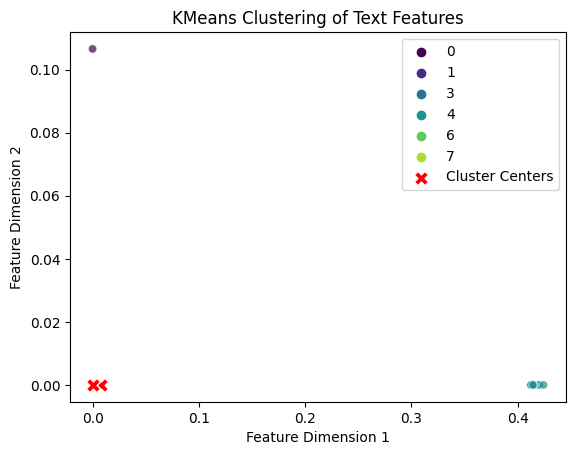

In [ ]:
sns.scatterplot(x=feature_matrix_array[:, 0], y=feature_matrix_array[:, 1], hue=labels, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering of Text Features')
plt.xlabel('Feature Dimension 1')
plt.ylabel('Feature Dimension 2')

# Scatter plot of cluster centers
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='red', marker='X', s=100, label='Cluster Centers')

## Reducción de dimensionalidad

In [ ]:
# n_components=100 = 40 s
# n_components=200 = 1 min

lsa = TruncatedSVD(n_components=200, algorithm='arpack')

tfidf_lsa = lsa.fit_transform(feature_matrix)

In [ ]:
# n_components=100 = 9s
# n_components=200 = 18s

kmeans_lsa = KMeans(n_clusters=9, random_state=42)
kmeans_lsa.fit(tfidf_lsa)
labels_lsa = kmeans_lsa.labels_
centers_lsa = kmeans_lsa.cluster_centers_

<Axes: title={'center': 'KMeans Clustering of Text Features'}, xlabel='Feature Dimension 1', ylabel='Feature Dimension 2'>

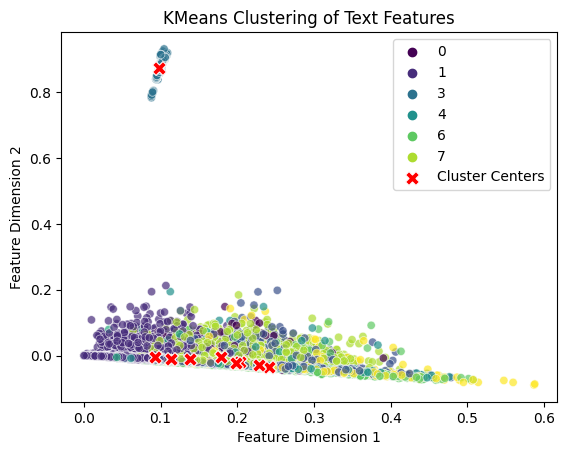

In [ ]:
sns.scatterplot(x=tfidf_lsa[:, 0], y=tfidf_lsa[:, 1], hue=labels_lsa, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering of Text Features')
plt.xlabel('Feature Dimension 1')
plt.ylabel('Feature Dimension 2')

# Scatter plot of cluster centers
sns.scatterplot(x=centers_lsa[:, 0], y=centers_lsa[:, 1], color='red', marker='X', s=100, label='Cluster Centers')

## Inercia

In [ ]:
# n_components=200 , rango 20 = 4 min

inertia = []
for num_clusters in range(1, 40):
    kmeans_lsa = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_lsa.fit(tfidf_lsa)
    inertia.append(kmeans_lsa.inertia_)


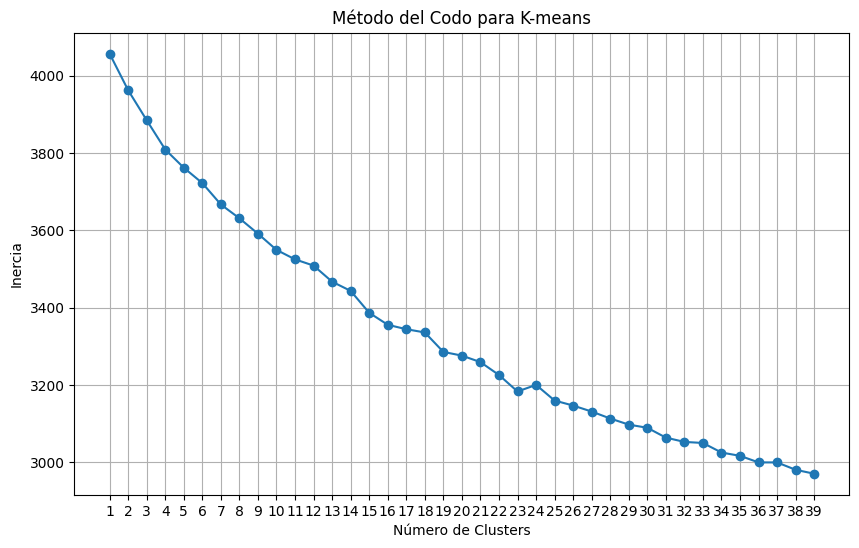

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.xticks(range(1, 40))
plt.grid(True)
plt.show()

## Usar solo sustantivos

In [ ]:
def only_nouns(review):
    doc = nlp(review)
    nouns = [token.text for token in doc if token.pos_ == 'NOUN']
    return ' '.join(nouns)

In [ ]:
# 12 min

df_transformado["only_nouns"] = [only_nouns(x) for x in df_transformado["cleaned_text"]]

In [ ]:
df_transformado.head(2)

,rating,review,cleaned_text,sentiment_rating,no_stopwords,lemmatized,neg,neu,pos,compound,sentiment_vader,stem,only_nouns
0,5.0,This is totallly one of the best hotels in the...,This is totallly one of the best hotels in the...,2.0,This totallly best hotels city The rooms heavi...,this be totallly one of the good hotel in the ...,0.00,0.821,0.179,0.6656,2,thi is totallli one of the best hotel in the c...,hotels city rooms halls
1,5.0,Recently stayed here over the holidays and was...,Recently stayed here over the holidays and was...,2.0,Recently stayed holidays impressed fronts The ...,recently stay here over the holiday and be imp...,0.04,0.775,0.185,0.9468,2,recent stay here over the holiday and wa impre...,holidays fronts location street barrestaurant ...


In [ ]:
df_transformado.drop(columns=["neg", "neu", "pos", "compound", "sentiment_vader"]).to_csv("/content/drive/MyDrive/Colab Notebooks/modelo_csv/df_noun.csv", sep="|", index=False)

In [ ]:
feature_matrix_only_nouns = feat_matrix(df_transformado["only_nouns"], 1, 1)

In [ ]:
feature_matrix_only_nouns.shape

(30785, 16984)

In [ ]:
# 1 min ngram (1,2)
# 12 s ngram (1,1)
kmeans_only_nouns = KMeans(n_clusters=9, random_state=42)
kmeans_only_nouns.fit(feature_matrix_only_nouns)
labels_only_nouns = kmeans_only_nouns.labels_
centers_only_nouns = kmeans_only_nouns.cluster_centers_

<Axes: title={'center': 'KMeans Clustering of Text Features'}, xlabel='Feature Dimension 1', ylabel='Feature Dimension 2'>

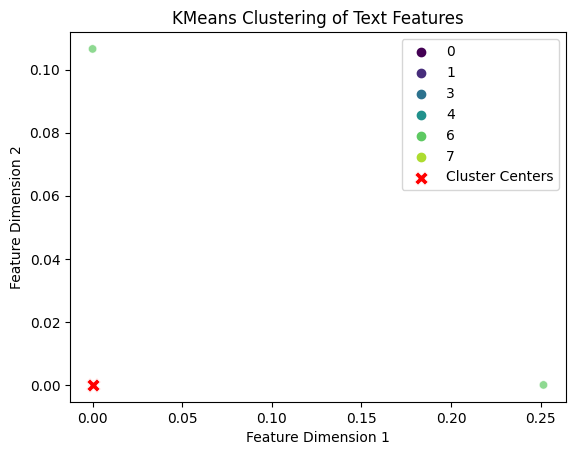

In [ ]:
sns.scatterplot(x=feature_matrix_only_nouns[:, 0].toarray().flatten(), y=feature_matrix[:, 1].toarray().flatten(), hue=labels_only_nouns, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering of Text Features')
plt.xlabel('Feature Dimension 1')
plt.ylabel('Feature Dimension 2')

# Scatter plot of cluster centers
sns.scatterplot(x=centers_only_nouns[:, 0], y=centers_only_nouns[:, 1], color='red', marker='X', s=100, label='Cluster Centers')

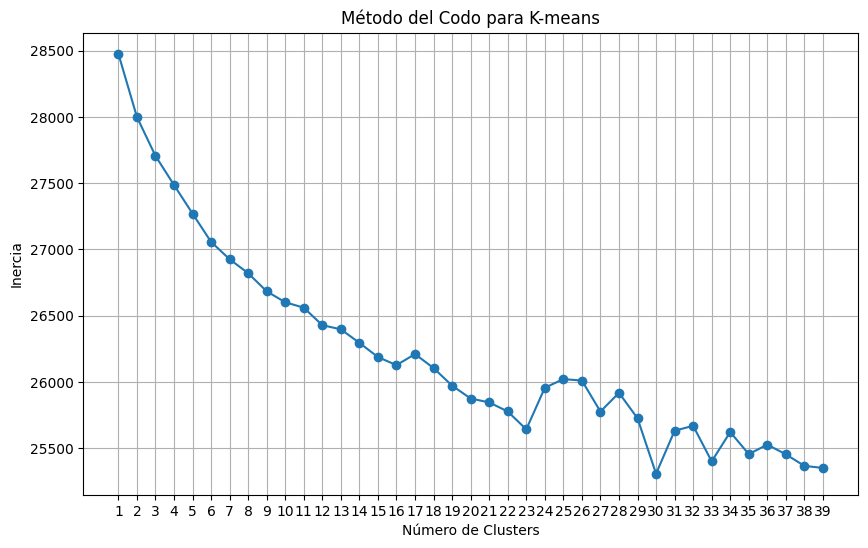

In [ ]:
# ngram (1,1) 13 min

inertia = []
for num_clusters in range(1, 40):
    kmeans_solo_sustantivos = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_solo_sustantivos.fit(feature_matrix_only_nouns)
    inertia.append(kmeans_solo_sustantivos.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.xticks(range(1, 40))
plt.grid(True)
plt.show()

In [ ]:
# n_components=100, ngram (1,2) = 40 s
# n_components=200, ngram (1,2) = 50 s
# n_components=200, solo sustantivos, ngram (1,2) = 1 min
# n_components=200, solo sustantivos, ngram (1,1) = 16 s
# n_components=100, solo sustantivos, ngram (1,1) = 10
lsa_solo_sustantivos = TruncatedSVD(n_components=100, algorithm='arpack')

tfidf_lsa_solo_sustantivos = lsa_solo_sustantivos.fit_transform(feature_matrix_only_nouns)

In [ ]:
# ngram (1,2) 12 min
# ngram (1,1) 12 min
# ngram (1,1) n_components=100 5 min
inertia = []
for num_clusters in range(1, 40):
    kmeans_lsa_solo_sustantivos = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_lsa_solo_sustantivos.fit(tfidf_lsa_solo_sustantivos)
    inertia.append(kmeans_lsa_solo_sustantivos.inertia_)

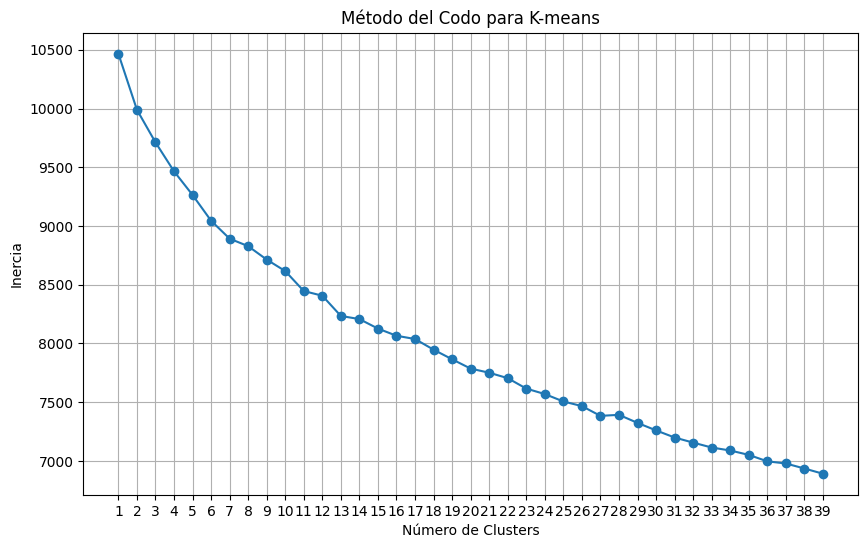

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.xticks(range(1, 40))
plt.grid(True)
plt.show()

# Deep Learning

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/modelo_csv/df_noun.csv", sep="|")

In [ ]:
# Configurar pandas para mostrar el contenido completo de las celdas de texto
pd.set_option('display.max_colwidth', None)


df.sample(1)["review"]

9819    We had dinner downstairs on the beach. Afterwards, we went into the hotel and went up to the rooftop bar. The view was gorgeous! Unfortunately, it was already dark by the time we got up there, but there was nice lighting and lots of seating. See pics...\n\nGreat place to watch a sunset at the end of the day!
Name: review, dtype: object

In [ ]:
model = "facebook/bart-large-mnli" # mas lento

In [4]:
model_2 = "MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7"

In [ ]:
model_3 = "MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli"

In [ ]:
model_4 = "sileod/deberta-v3-base-tasksource-nli"

In [ ]:
model_5 ='roberta-large-mnli'

In [ ]:
candidate_labels = ["cleaning and bugs", "room and comfort", "staff and services", "food and drinks", "money"]

candidate_labels_total = ["cleaning and order", "bugs and animals", "room and comfort", "staff and services", "money", "noise", "food and drinks", "facilities and location"]

In [ ]:
zsc_bart = pipeline("zero-shot-classification", model = model)

In [5]:
zsc_mDeBERTa = pipeline("zero-shot-classification", model = model_2)

In [ ]:
zsc_mDeBERTa_fever = pipeline("zero-shot-classification", model = model_3)

In [ ]:
zsc_mDeBERTa_tasksource = pipeline("zero-shot-classification", model = model_4)

In [ ]:
zsc_roberta = pipeline("zero-shot-classification", model = model_5)

In [ ]:
def zero_shot_classification(text, candidate_labels, model):
    results = model(text, candidate_labels)
    return results

In [ ]:
def zero_shot_classification(text, candidate_labels, model):
    results = model(text, candidate_labels)
    predicted_labels = []

    # Obtener la etiqueta con el puntaje más alto
    max_score_label = max(results['scores'])
    max_score_index = results['scores'].index(max_score_label)
    max_score_label = results['labels'][max_score_index]

    threshold = 0.3  # Umbral de confianza para considerar una etiqueta
    for label, score in zip(results['labels'], results['scores']):
        if score > threshold:
            predicted_labels.append(label)

    # Si ninguna etiqueta pasa el umbral, usar la etiqueta con el mayor score
    if not predicted_labels:
        predicted_labels.append(max_score_label)

    return predicted_labels


In [ ]:
# 9/10
zero_shot_classification(df["cleaned_text"][9819], candidate_labels, zsc_bart)

['food and drinks']

In [ ]:
# 9/10
zero_shot_classification(df["cleaned_text"][9819], candidate_labels, zsc_mDeBERTa)

['food and drinks']

In [ ]:
# 9/10
zero_shot_classification(df["cleaned_text"][9819], candidate_labels, zsc_mDeBERTa_fever)

['room and comfort', 'food and drinks']

In [ ]:
# 8.5/10
zero_shot_classification(df["cleaned_text"][9819], candidate_labels, zsc_mDeBERTa_tasksource)

['food and drinks']

In [ ]:
# 6.5/10
zero_shot_classification(df["cleaned_text"][9819], candidate_labels, zsc_roberta)

['food and drinks']

In [ ]:
# 5.5/10
zero_shot_classification(df["only_nouns"][9819], candidate_labels, zsc_bart)

['food and drinks', 'room and comfort']

In [ ]:
# 6.5/10
zero_shot_classification(df["only_nouns"][9819], candidate_labels, zsc_mDeBERTa)

['food and drinks']

In [ ]:
# 5/10
zero_shot_classification(df["only_nouns"][9819], candidate_labels, zsc_mDeBERTa_fever)

['food and drinks']

In [ ]:
# 6.5/10
zero_shot_classification(df["only_nouns"][9819], candidate_labels, zsc_mDeBERTa_tasksource)

['food and drinks']

In [ ]:
# 7/10
zero_shot_classification(df["only_nouns"][9819], candidate_labels, zsc_roberta)

['food and drinks']

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model)
tokenizer_2 = AutoTokenizer.from_pretrained(model_2)
tokenizer_3 = AutoTokenizer.from_pretrained(model_3)
tokenizer_4 = AutoTokenizer.from_pretrained(model_4)

In [ ]:

automodel = AutoModelForSequenceClassification.from_pretrained(model)
automodel_2 = AutoModelForSequenceClassification.from_pretrained(model_2)
automodel_3 = AutoModelForSequenceClassification.from_pretrained(model_3)
automodel_4 = AutoModelForSequenceClassification.from_pretrained(model_4)

In [ ]:
categories = ["comida", "staff", "ubicación", "habitaciones", "servicios"]

reviews = [
    "El servicio en este hotel es excelente, el personal es muy amable.",
    "La comida del restaurante es deliciosa y variada.",
    "La ubicación del hotel es perfecta, cerca de todo.",
    "Las habitaciones son cómodas y limpias.",
    "Los servicios ofrecidos son de alta calidad."
]

for review in reviews:
    template = "Esta reseña es sobre {}."
    inputs = tokenizer(review, template.format(" ".join(categories)), return_tensors="pt", padding=True, truncation=True)
    outputs = automodel(**inputs)
    predicted_label = categories[outputs.logits.argmax()]
    print(f"La reseña '{review}' fue clasificada como '{predicted_label}'.")

La reseña 'El servicio en este hotel es excelente, el personal es muy amable.' fue clasificada como 'ubicación'.
La reseña 'La comida del restaurante es deliciosa y variada.' fue clasificada como 'comida'.
La reseña 'La ubicación del hotel es perfecta, cerca de todo.' fue clasificada como 'comida'.
La reseña 'Las habitaciones son cómodas y limpias.' fue clasificada como 'staff'.
La reseña 'Los servicios ofrecidos son de alta calidad.' fue clasificada como 'staff'.


In [ ]:
def zero_shot_classification_2(text, candidate_labels, model, tokenizer):
    template = "This review is about {}."
    inputs = tokenizer(text, template.format(" ".join(categories)), return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    predicted_label = candidate_labels[outputs.logits.argmax()]
    return predicted_label

In [ ]:
zero_shot_classification_2(df["cleaned_text"][3766], candidate_labels, automodel_2, tokenizer_2)

'staff and services'

## Embedding

In [ ]:
df_muestra = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/reviews_muestra.csv")

In [ ]:
df_muestra.head(2)

,Unnamed: 0,user_id,user_name,date,rating,review,gmap_id,business_name,address,latitude,longitude,category,avg_rating,num_of_reviews,state,sentiment,review_label,Unnamed: 17
0,3111.0,1.035460e+20,Neil Chetram (Realtor),12/18/2017,1.0,Management was extremely unhelpful... One mana...,0x88e782f7baf68ba3:0x6a94abfda168c3b2,Red Roof Inn Orlando West,"Red Roof Inn Orlando West, 11241 W Colonial Dr...",28.552726,-81.546144,"['Hotel', 'Inn', 'Motel']",3.7,428.0,FL,negative,staff and services,NaN
1,2157.0,1.126010e+20,Rod Wilson,3/17/2019,5.0,"Nice, clean, comfortable, rooms for the price....",0x88dd3682ea514e51:0xf07fa27796c4fdb6,Wilson Court Motel,"Wilson Court Motel, 301 N Thomas St, Plant Cit...",28.016800,-82.126328,"['Motel', 'Hotel']",2.6,28.0,FL,positive,hygiene and order,NaN


In [ ]:
embedding_model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

In [ ]:
list(df_muestra["review"][0:10])

['Management was extremely unhelpful... One manager Carlos, has to be the worst person in hospitality. I booked a room through Priceline for a certain date and because I used a third-party it would seem he was extremely irritated. The experience was so bad I then proceeded to request a refund within an hour of booking and was denied. Warning this place will steal your money and the manager Carlos will insure it!',
 'Nice, clean, comfortable, rooms for the price. On site guest laundry. Walking distance to download.',
 'My wife and I took off to spend a weekend together in an intimate setting and we were not disappointed. The property is absolutely perfect. It was a little cool during our stay. However, the heated pool was perfect in the chilly weather! The loft was so awesome, we requested a tour of the facility and the owner was gracious enough to show us all of the unoccupied lofts. Every one of them was themed and just amazingly decorated. The location is perfect! It is walking dista

In [ ]:
list(df_muestra["review_label"][0:10])

['staff and services',
 'hygiene and order',
 'facilities and location',
 'staff and services',
 'adjectives',
 'facilities and location',
 'adjectives',
 'facilities and location',
 'adjectives',
 'hygiene and order']

In [ ]:
sentences = [
    "Este es un ejemplo de clasificación zero-shot.",
    "Los gatos son animales domésticos.",
    "La energía solar es una fuente renovable.",
    "La gravedad es una fuerza fundamental.",
    "Los humanos tienen cinco sentidos."
]

labels = ["Tecnología", "Animales", "Energía", "Física", "Biología"]

In [ ]:
sentence_embeddings = embedding_model.encode(sentences, convert_to_tensor=True)

In [ ]:
sentence_embeddings.shape

torch.Size([5, 768])

In [ ]:
def embedding(text, embedding_model):

  # Generar el embedding de la oración de consulta
  query_embedding = embedding_model.encode([text], convert_to_tensor=True)

  # Calcular las similitudes entre el embedding de consulta y los embeddings de las oraciones de ejemplo
  similarities = (query_embedding @ sentence_embeddings.T).squeeze()

  # Encontrar la etiqueta con la mayor similitud
  max_similarity_idx = similarities.argmax()
  predicted_label = labels[max_similarity_idx]

  return (f"La oración '{text}' fue clasificada como '{predicted_label}' con una similitud de {similarities[max_similarity_idx]:.2f}")


In [ ]:
text = "Háblame sobre los felinos."
embedding(text,embedding_model)

"La oración 'Háblame sobre los felinos.' fue clasificada como 'Biología' con una similitud de 217.98"

In [ ]:
sentences = list(df_muestra["review"])

labels = list(df_muestra["review_label"])

In [ ]:
text = "a lot of money"
embedding(text,embedding_model)

"La oración 'a lot of money' fue clasificada como 'adjectives' con una similitud de 190.35"

## Embeddings y Clustering

In [ ]:
# Cargar un modelo de embeddings preentrenado de SentenceTransformers
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [ ]:
df['cleaned_text'][0:3].tolist()

['This is totallly one of the best hotels in the city  The rooms are heavily appointed and the halls are too  You cant go wrong here',
 'Recently stayed here over the holidays and was impressed on all fronts The location is perfect  who wants to stay in the overpriced Quarter anyway Right across the street from Lucys which is a localish barrestaurant and walking distance to great restaurants bars shopping galleries and the casino Couple blocks up and you can catch the St Charles street car uptown for a buck 25 The staff was superfriendly gave us a wine key as we forgot one the placeroom was very clean and even the valet guys joked around with us 28 overnightugh bed shower and noise levels all checked out as well  highly recd',
 'I was pretty pleased with the hotel The location is pretty good but not the greatest Everyone who comes to New Orleans wants to go to the quarter and while the Renaissance isnt far its not that close either   The service here was great especially the valet guys

In [ ]:
# 20 min

# Calcular los embeddings de las reseñas
sentences = df['cleaned_text'].tolist()
sentence_embeddings = model.encode(sentences, convert_to_tensor=True)

# Mover los embeddings a la memoria de la CPU
sentence_embeddings_cpu = sentence_embeddings.cpu().numpy()

In [ ]:
# 15 min
inertia_values = []
possible_clusters = range(1, 25)  # Try different numbers of clusters
for num_clusters in possible_clusters:
    kmeans_embedding = KMeans(n_clusters=num_clusters)
    kmeans_embedding.fit(sentence_embeddings_cpu)
    inertia_values.append(kmeans_embedding.inertia_)

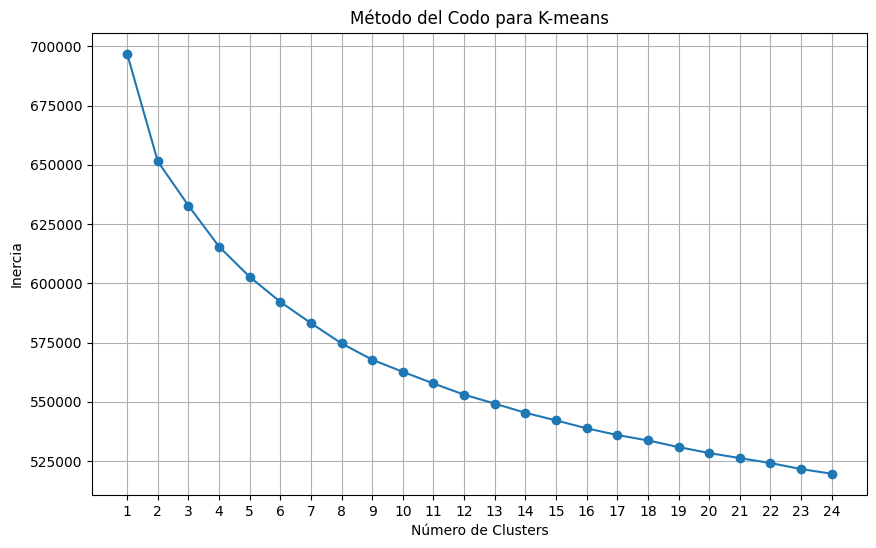

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), inertia_values, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.xticks(range(1, 25))
plt.grid(True)
plt.show()

In [ ]:
kmeans_embedding = KMeans(n_clusters=20, random_state=42)
kmeans_embedding.fit(sentence_embeddings_cpu)
labels = kmeans_embedding.labels_
centers = kmeans_embedding.cluster_centers_

KMeans(n_clusters=20, random_state=42)

<Axes: title={'center': 'KMeans Clustering of Sentence Embeddings'}, xlabel='Embedding Dimension 1', ylabel='Embedding Dimension 2'>

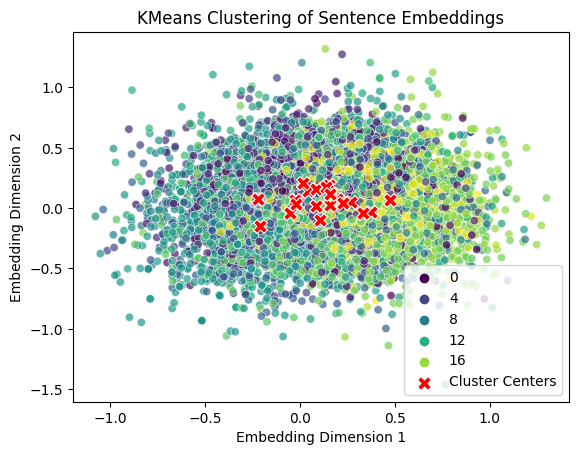

In [ ]:
# Scatter plot of data points with cluster colors
sns.scatterplot(x=sentence_embeddings_cpu[:, 0], y=sentence_embeddings_cpu[:, 1], hue=labels, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering of Sentence Embeddings')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')

# Scatter plot of cluster centers
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='red', marker='X', s=100, label='Cluster Centers')


In [ ]:
df['only_nouns'] = [str(x) for x in df['only_nouns']]

In [ ]:
def remove_stopwords(text, stopwords_list):
  tokens = word_tokenize(text)
  filtered_sentence = []
  for i in tokens:
    if i not in stopwords_list:
        filtered_sentence.append(i)

  return " ".join(filtered_sentence)

In [ ]:
# 6 min

# Calcular los embeddings de las reseñas
sentences = df['only_nouns'].tolist()
sentence_embeddings = model.encode(sentences, convert_to_tensor=True)

In [ ]:
# Mover los embeddings a la memoria de la CPU
sentence_embeddings_cpu = sentence_embeddings.cpu().numpy()

In [ ]:
# 13 min
inertia_values = []
possible_clusters = range(1, 25)  # Try different numbers of clusters
for num_clusters in possible_clusters:
    kmeans_embedding = KMeans(n_clusters=num_clusters)
    kmeans_embedding.fit(sentence_embeddings_cpu)
    inertia_values.append(kmeans_embedding.inertia_)

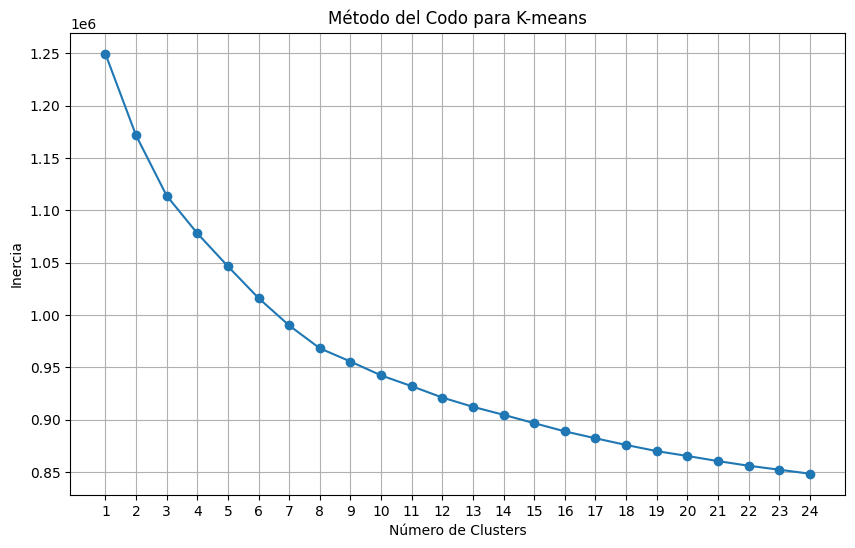

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), inertia_values, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.xticks(range(1, 25))
plt.grid(True)
plt.show()

In [ ]:
kmeans_embedding = KMeans(n_clusters=20, random_state=42)
kmeans_embedding.fit(sentence_embeddings_cpu)
labels = kmeans_embedding.labels_
centers = kmeans_embedding.cluster_centers_

<Axes: title={'center': 'KMeans Clustering of Sentence Embeddings'}, xlabel='Embedding Dimension 1', ylabel='Embedding Dimension 2'>

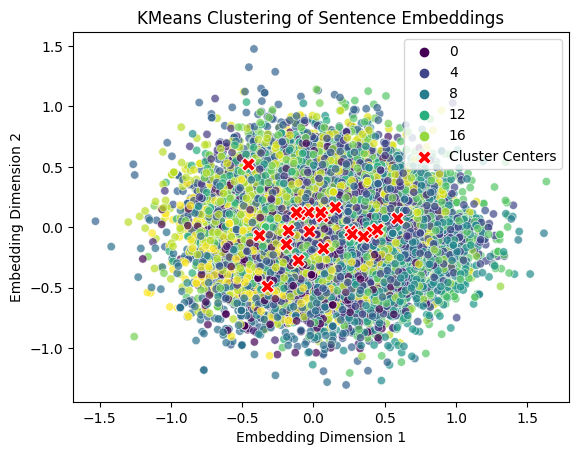

In [ ]:
# Scatter plot of data points with cluster colors
sns.scatterplot(x=sentence_embeddings_cpu[:, 0], y=sentence_embeddings_cpu[:, 1], hue=labels, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering of Sentence Embeddings')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')

# Scatter plot of cluster centers
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='red', marker='X', s=100, label='Cluster Centers')